In [1]:
import pandas as pd
df = pd.read_csv("sample_logs.csv")
print(df.head())

             timestamp log_level       source                     message  \
0  2025-07-31 02:06:59      INFO  application          Connection refused   
1  2025-07-31 02:07:29     ERROR         auth          Connection refused   
2  2025-07-31 02:07:59     DEBUG     firewall  Malware signature detected   
3  2025-07-31 02:08:29     DEBUG         auth            System heartbeat   
4  2025-07-31 02:08:59     DEBUG     firewall          Anomaly score high   

        ip_address  
0   192.168.73.157  
1   192.168.236.68  
2    192.168.40.12  
3   192.168.73.185  
4  192.168.111.195  


In [2]:
import numpy as np

# Simulate 50 minutes of normal login attempt counts (around 5 per minute on average)
np.random.seed(42)  # for reproducible example
normal_counts = np.random.poisson(lam=5, size=50)

# Simulate anomaly: a spike in login attempts (e.g., an attacker tries 30+ times in a minute)
anomalous_counts = np.array([30, 40, 50])

# Combine the data
login_attempts = np.concatenate([normal_counts, anomalous_counts])
print("Login attempts per minute:", login_attempts)

Login attempts per minute: [ 5  4  4  5  5  3  5  4  6  7  2  5  5  6  4  6  6  1  7  2 11  4  3  8
  3  3  5  8  3  2  5  3  8 10  3  2  5  7  6  6  2  4  9  7 11  8  3  2
  3  4 30 40 50]


In [3]:
from sklearn.ensemble import IsolationForest

# Prepare the data in the shape the model expects (samples, features)
X = login_attempts.reshape(-1, 1)  # each sample is a 1-dimensional [count]

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
# contamination=0.05 means we expect about 5% of the data to be anomalies

# Train the model on the data
model.fit(X)

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [4]:
# Use the model to predict anomalies
labels = model.predict(X)
# The model outputs +1 for normal points and -1 for anomalies

# Extract the anomaly indices and values
anomaly_indices = np.where(labels == -1)[0]
anomaly_values = login_attempts[anomaly_indices]

print("Anomaly indices:", anomaly_indices)
print("Anomaly values (login attempts):", anomaly_values)

Anomaly indices: [50 51 52]
Anomaly values (login attempts): [30 40 50]


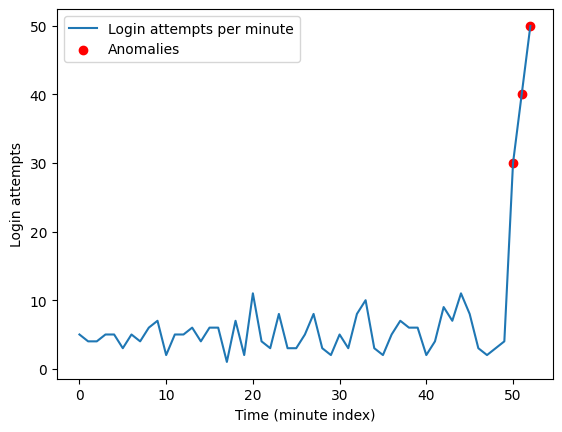

In [5]:
import matplotlib.pyplot as plt

plt.plot(login_attempts, label="Login attempts per minute")
plt.scatter(anomaly_indices, anomaly_values, color='red', label="Anomalies")
plt.xlabel("Time (minute index)")
plt.ylabel("Login attempts")
plt.legend()
plt.show()

In [6]:
if len(anomaly_indices) > 0:
    print(f"Alert! Detected {len(anomaly_indices)} anomalous events. Initiating response procedures...")
    # Here, you could add code to disable a user or notify an admin, etc.

Alert! Detected 3 anomalous events. Initiating response procedures...
